In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [36]:
data=pd.read_csv('/Users/rafa/BootCamp/project1/TeamProject/data/BJ_to_model.csv')
var_drop='tvivhab tvivpar vivpar_hab vivpar_ut tvivhab tvivpar vivpar_hab vivpar_ut pct_t_inhab_hh pct_privhh pct_privhh_inhab pct_hhtemp'.split()
data.drop(columns=var_drop,inplace=True)

In [37]:
data_20=data[data['tiempo']==2020]
data_10=data[data['tiempo']==2010]

In [91]:
data['price_m2'].describe()

count    3.670000e+02
mean     8.726345e+04
std      7.314372e+05
min      5.671642e+02
25%      1.823758e+04
50%      3.497222e+04
75%      4.285714e+04
max      9.950405e+06
Name: price_m2, dtype: float64

In [95]:
Q1 = data_20['price_m2'].quantile(0.25)
Q3 = data_20['price_m2'].quantile(0.75)
IQR = Q3 - Q1

In [97]:
cl=(data['price_m2'] < (Q1 - 1.5 * IQR)) |(data['price_m2'] > (Q3 + 1.5 * IQR))
data_20=data[(data['tiempo']==2020)&~cl]
data_10=data[(data['tiempo']==2010)&~cl]

In [98]:
X=data_20.drop(columns=['price_m2','id','tiempo'])
y=data_20.price_m2

In [99]:
X.isna().sum()

pobtot         0
p_0a2         25
p_60ymas       0
prom_hnv       0
graproes       0
graproes_f     0
pocupada       0
pocupada_f     1
pder_ss        0
vivtot         0
prom_ocup      0
vph_2ymasd     1
vph_autom      0
vph_pc         0
vph_inter      0
pct_0a2       25
pct_60         0
pct_wf         1
pct_hh_car     0
pct_hh_pc      0
pct_hh_int     0
dtype: int64

## Filling NAs

In [100]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)

X_filled=imp.transform(X)

## Standarizing features

In [101]:
scaler = preprocessing.StandardScaler().fit(X_filled)
X_scaled = scaler.transform(X_filled)

## Splitting in train and test

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.33, random_state=42)

<AxesSubplot:>

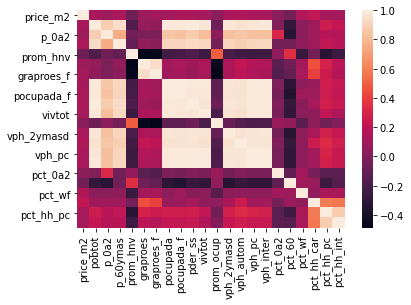

In [103]:
sns.heatmap(data_20.drop(columns=['id','tiempo']).corr())

In [104]:
gbr = GradientBoostingRegressor(
learning_rate=0.1,
n_estimators=200,
subsample=0.6,
random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42, subsample=0.6)

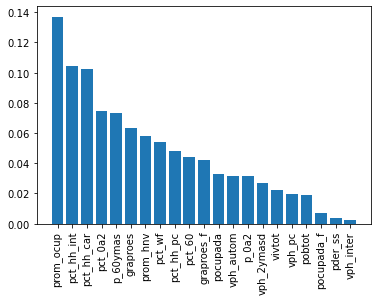

In [105]:
# feature importances from random forest model
importances = gbr.feature_importances_
# index of greatest to least feature importances
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
# create tick labels
feature_names=list(data_20.drop(columns=['price_m2','id','tiempo']))
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)
# rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [106]:
X_10=data_10.drop(columns=['price_m2','id','tiempo'])

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_10)

X_10=imp.transform(X_10)

pd.DataFrame({'precio m2 2010 predicted':gbr.predict(X_10),
              'precio m2 2020':y,
              'ratio':100*(y/gbr.predict(X_10))-100})

,precio m2 2010 predicted,precio m2 2020,ratio
1,22030.929260,4306.580556,-80.452116
3,25439.385482,38700.178151,52.127017
5,17450.394445,28922.651934,65.742110
7,29266.244823,37155.963303,26.958424
9,8564.120534,28277.634961,230.187260
11,28618.996829,11047.619048,-61.397602
13,24057.468358,11718.552701,-51.289335
15,43145.137401,56640.625000,31.279278
17,26242.364835,34260.855263,30.555518
19,33606.768486,45405.405405,35.107919


In [107]:
change=100*(y/gbr.predict(X_10))-100
print(change.mean())
print(change.max())

30.510772466480944
440.3100403308821


<AxesSubplot:xlabel='price_m2', ylabel='Count'>

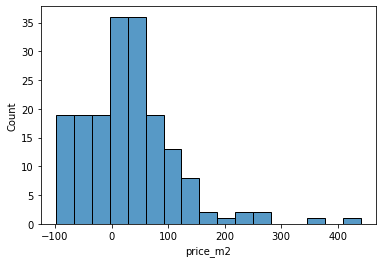

In [108]:
sns.histplot(change)